In [175]:
import time
from __future__ import division
from web3 import Web3, HTTPProvider
import json

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("whitegrid")
seaborn.despine()
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

# Connect to the network
web3 = Web3(HTTPProvider('http://localhost:8545'))

# Get contract signature
with open('../ethereum/build/contracts/Market.json') as energy_file:    
    energy_json = json.load(energy_file)
contract_abi = energy_json['abi']
network_id = energy_json['networks'].keys()[-1]
contract_address = energy_json['networks'][network_id]['address']

# List accounts and set default account
accounts = web3.eth.accounts
web3.eth.defaultAccount = accounts[0]
contract = web3.eth.contract(contract_abi, contract_address)
energy_posted_event = contract.on('energy_posted_event', filter_params={'fromBlock': 'earliest'})
market_cleared_event = contract.on('market_cleared_event', filter_params={'fromBlock': 'earliest'})
bill_sent_event = contract.on('bill_sent_event', filter_params={'fromBlock': 'earliest'})
participant_at_clearing_request = contract.on('participant_at_clearing_request', filter_params={'fromBlock': 'earliest'})

In [176]:
# Check how many participants have been added
print('Number of accounts ' + str(len(accounts)))
print('Number of participants ' + str(contract.call().number_of_participant()))

Number of accounts 10
Number of participants 10


In [177]:
# Collect Blockchain info
market_15min_info = market_cleared_event.get(only_changes=False)
customers_15min_netload = energy_posted_event.get(only_changes=False)
customers_15min_bill = bill_sent_event.get(only_changes=False)
participants = participant_at_clearing_request.get(only_changes=False)

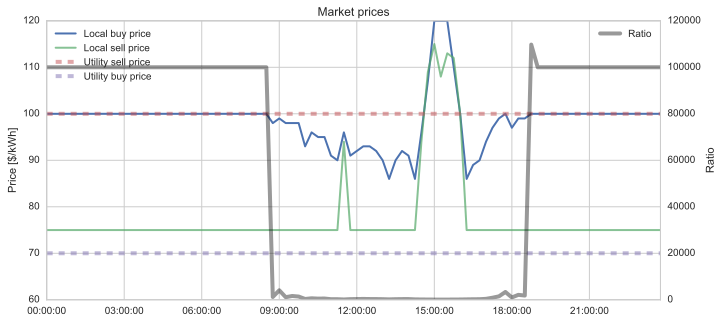

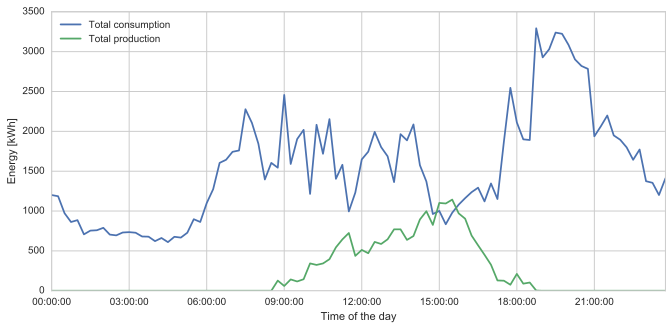

In [178]:
# Plot market prices
time = pandas.date_range('2017-09-21 00:00:00', periods=len(market_15min_info), freq='15T')
yb = [block['args']['_buy'] for block in market_15min_info]
ys = [block['args']['_sell'] for block in market_15min_info]
yr = [block['args']['_ratio'] for block in market_15min_info]

# Create plot
plt.figure(figsize=(11, 5), dpi=200)
plt.plot(time, yb, label='Local buy price', linewidth=2, alpha=1)
plt.plot(time, ys, label='Local sell price', linewidth=2, alpha=0.7)
plt.plot(time, [100] * len(time), '--', label='Utility sell price', linewidth=4, alpha=0.5)
plt.plot(time, [70] * len(time), '--',label='Utility buy price', linewidth=4, alpha=0.5)
plt.ylabel('Price [$/kWh]')
plt.ylim([60, 120])
plt.legend(loc=2)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(time, yr, label='Ratio', linewidth=4, color='black', alpha=0.4)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax.get_yticks())))
ax2.grid(False)
plt.ylabel('Ratio')
plt.title('Market prices')
plt.xlabel('Time of the day')
plt.legend(loc=0)
plt.show()

# Plot market prices
# time = pandas.date_range('2017-09-21 00:00:00', periods=len(market_15min_info), freq='15T')
yc = [block['args']['_cons'] / 4 for block in market_15min_info]
yg = [block['args']['_gen'] / 4 for block in market_15min_info]

# Create plot
plt.figure(figsize=(11, 5), dpi=200)
plt.plot(time, yc, label='Total consumption')
plt.plot(time, yg, label='Total production')
plt.xlabel('Time of the day')
plt.ylabel('Energy [kWh]')
plt.legend(loc=0)
plt.show()

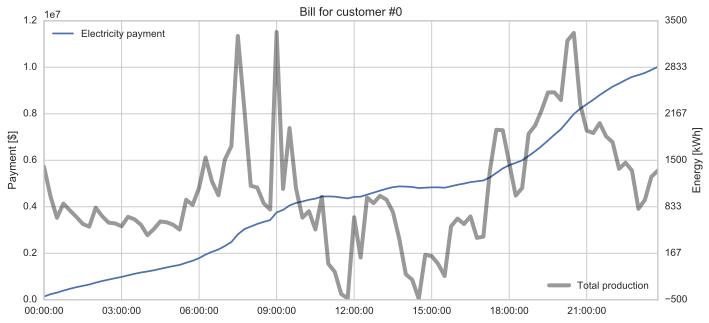

In [179]:
# Customer perspective
account_index = 0

customers_15min_bill2 = [block for block in customers_15min_bill 
                        if block['args']['_target'] == accounts[account_index]]
customers_15min_netload2 = [block for block in customers_15min_netload 
                           if block['args']['_target'] == accounts[account_index]]
time = pandas.date_range('2017-09-21 00:00:00', periods=len(market_15min_info), freq='15T')
bill = [block['args']['_value'] for block in customers_15min_bill2]
netload = [block['args']['_value'] for block in customers_15min_netload2]

# Create plot
plt.figure(figsize=(11, 5), dpi=200)
plt.plot(time, np.cumsum(bill), label='Electricity payment')
plt.ylabel('Payment [$]')
plt.legend(loc=2)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(time, netload, label='Total production', linewidth=4, color='black', alpha=0.4)
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax.get_yticks())))
ax2.grid(False)
plt.xlabel('Time of the day')
plt.ylabel('Energy [kWh]')
plt.legend(loc=4)
plt.title('Bill for customer #' + str(account_index))
plt.show()

# Plot for the paper

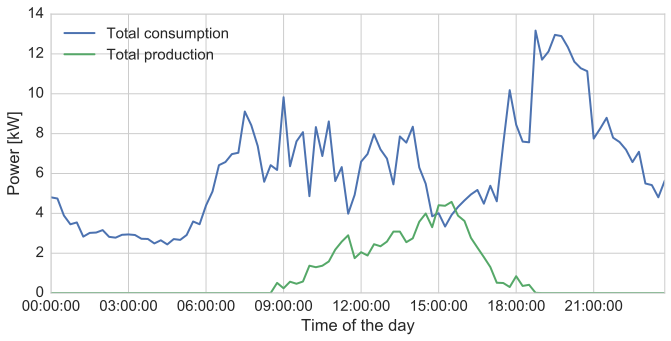

In [201]:
seaborn.set(font_scale=1.5)
seaborn.set_style("whitegrid")
seaborn.despine()

# Plot production
time = pandas.date_range('2017-09-21 00:00:00', periods=len(market_15min_info), freq='15T')
yc = [block['args']['_cons'] / 1000 for block in market_15min_info]
yg = [block['args']['_gen'] / 1000 for block in market_15min_info]

# Create plot
plt.figure(figsize=(11, 5), dpi=200)
plt.plot(time, yc, label='Total consumption', linewidth=2)
plt.plot(time, yg, label='Total production', linewidth=2)
plt.xlabel('Time of the day')
plt.ylabel('Power [kW]')
plt.legend(loc=0)
plt.show()

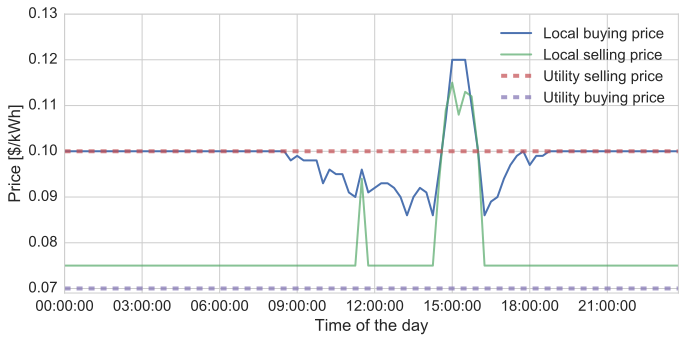

In [200]:
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
seaborn.set(font_scale=1.5)
seaborn.set_style("whitegrid")
seaborn.despine()
# Plot market prices
time = pandas.date_range('2017-09-21 00:00:00', periods=len(market_15min_info), freq='15T')
yb = [block['args']['_buy'] / 1000 for block in market_15min_info]
ys = [block['args']['_sell'] / 1000 for block in market_15min_info]
yr = [block['args']['_ratio'] / 1000 for block in market_15min_info]

# Create plot
plt.figure(figsize=(11, 5), dpi=200)
plt.plot(time, yb, label='Local buying price', linewidth=2, alpha=1)
plt.plot(time, ys, label='Local selling price', linewidth=2, alpha=0.7)
plt.plot(time, [0.1] * len(time), '--', label='Utility selling price', linewidth=4, alpha=0.7)
plt.plot(time, [0.07] * len(time), '--',label='Utility buying price', linewidth=4, alpha=0.7)
plt.ylabel('Price [$/kWh]')
# plt.title('Market prices')
plt.xlabel('Time of the day')
plt.legend(loc=0)
plt.ylim([0.069, 0.13])
plt.show()

In [182]:
# Calculate Bill difference from PGE and market
time = pandas.date_range('2017-09-21 00:00:00', periods=len(market_15min_info), freq='15T')
customers = pandas.DataFrame(index=time)

# Get basic info from blockchain into pandas dataframe
for account_index in range(0, 10):
    customers_15min_bill2 = [block for block in customers_15min_bill 
                            if block['args']['_target'] == accounts[account_index]]
    customers_15min_netload2 = [block for block in customers_15min_netload 
                               if block['args']['_target'] == accounts[account_index]]
    bill = [block['args']['_value'] for block in customers_15min_bill2]
    netload = [block['args']['_value'] for block in customers_15min_netload2]
    customers['bill#' + str(account_index)] = bill
    customers['netload#' + str(account_index)] = netload

# Calculate cummulative bill
for account_index in range(0, 10):
    customers['cumbill#' + str(account_index)] = np.cumsum(customers['bill#' + str(account_index)])

# Calculate what bill would have been from PGE
pgebuy = 70
pgesell = 100
for account_index in range(0, 10):
    customers['pgebill#' + str(account_index)] = customers['netload#' + str(account_index)].apply(
        lambda x: x * pgesell if x >= 0 else x * pgebuy)
    customers['cumpgebill#' + str(account_index)] = np.cumsum(customers['pgebill#' + str(account_index)])

In [183]:
bill_reduction = []
for a in range(0, 10):
    bill_reduction.append((customers['cumpgebill#' + str(a)].iloc[-1] - customers['cumbill#' + str(a)].iloc[-1])
      * 100 / abs(customers['cumpgebill#' + str(a)].iloc[-1]))
print('Average bill reduction is ' + str(sum(bill_reduction) / len(bill_reduction)) + '%')

Average bill reduction is 17.639516362%


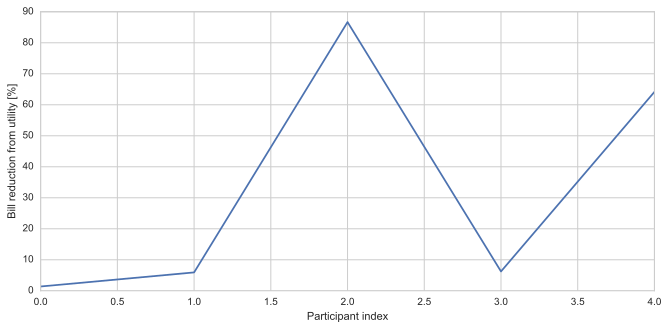

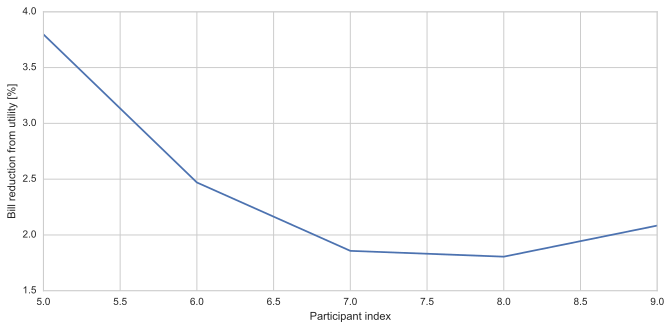

In [184]:
plt.figure(figsize=(11, 5))
plt.plot(range(0, 5), bill_reduction[0:5])
plt.ylabel('Bill reduction from utility [%]')
plt.xlabel('Participant index')
plt.show()

plt.figure(figsize=(11, 5))
plt.plot(range(5, 10), bill_reduction[5:10])
plt.ylabel('Bill reduction from utility [%]')
plt.xlabel('Participant index')
plt.show()

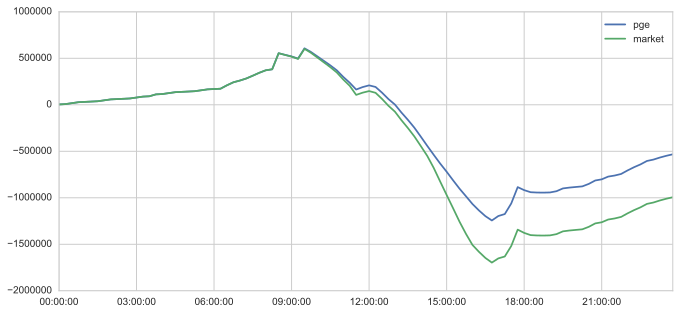

In [185]:
plt.figure(figsize=(11, 5))
plt.plot(customers['cumpgebill#2'], label='pge')
plt.plot(customers['cumbill#2'], label='market')
plt.legend(loc=0)
plt.show()

In [186]:
customers.head()

,bill#0,netload#0,bill#1,netload#1,bill#2,netload#2,bill#3,netload#3,bill#4,netload#4,...,pgebill#5,cumpgebill#5,pgebill#6,cumpgebill#6,pgebill#7,cumpgebill#7,pgebill#8,cumpgebill#8,pgebill#9,cumpgebill#9
2017-09-21 00:00:00,140800,1408,42100,421,3600,36,59900,599,2700,27,...,3500,3500,77700,77700,37400,37400,42800,42800,69900,69900
2017-09-21 00:15:00,98500,985,68200,682,3600,36,76300,763,10900,109,...,3600,7100,103400,181100,23800,61200,37300,80100,48800,118700
2017-09-21 00:30:00,67600,676,48400,484,10200,102,59500,595,11100,111,...,3600,10700,77400,258500,15000,76200,40500,120600,55800,174500
2017-09-21 00:45:00,87900,879,25900,259,10100,101,39100,391,2900,29,...,9500,20200,59000,317500,15000,91200,45500,166100,50200,224700
2017-09-21 01:00:00,78200,782,37700,377,3600,36,31700,317,3000,30,...,41000,61200,53200,370700,11500,102700,60600,226700,33900,258600
